PART A

Hierarchical Clustering

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('Mall_Customers.csv')

In [5]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = dataset.iloc[:,[3,4]].values

In [7]:
import scipy.cluster.hierarchy as sch

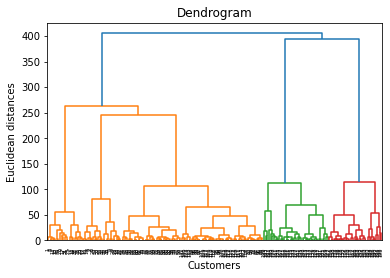

In [8]:
dendrogram = sch.dendrogram(sch.linkage(X,method = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Fitting hierarchical clustering to the Mall_Customes dataset



# There are two algorithms for hierarchical clustering: Agglomerative Hierarchical Clustering and

# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our

# algorithm class

In [9]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage ='ward')

In [10]:
y_hc = hc.fit_predict(X)

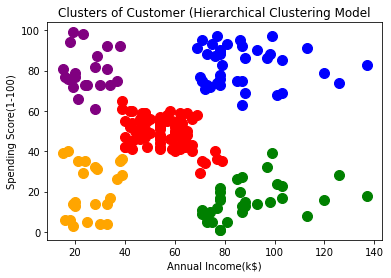

In [11]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='green', label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='red', label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='blue', label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='purple', label='Cluster 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='orange', label='Cluster 5')
plt.title('Clusters of Customer (Hierarchical Clustering Model')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

# Text analysis using topic modelling

In [13]:
import pandas as pd
import os

In [20]:
papers  = pd.read_csv('papers.csv')
#Uncomment the following lines if you are going to upload the file to Colab 
#from google.colab import files
#f = files.upload()
#papers  = pd.read_csv('papers.csv')

In [21]:
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [22]:
#Cleaning
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
5166,2015,Double or Nothing: Multiplicative Incentive Me...,Crowdsourcing has gained immense popularity in...,Double or Nothing: Multiplicative\nIncentive M...
1180,2001,Exact differential equation population dynamic...,Abstract Missing,Exact differential equation population\ndynami...
1838,1989,Recognizing Hand-Printed Letters and Digits,Abstract Missing,Recognizing Hand-Printed Letters and Digits\n\...
4846,2014,Learning on graphs using Orthonormal Represent...,Existing research \cite{reg} suggests that emb...,Learning on graphs using Orthonormal\nRepresen...
1745,2004,Variational Minimax Estimation of Discrete Dis...,Abstract Missing,Variational minimax estimation of discrete\ndi...


In [23]:
import re

#remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]','',x))

In [24]:
#convert to lower case and print first rows
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
papers['paper_text_processed'].head()

5166    double or nothing: multiplicative\nincentive m...
1180    exact differential equation population\ndynami...
1838    recognizing hand-printed letters and digits\n\...
4846    learning on graphs using orthonormal\nrepresen...
1745    variational minimax estimation of discrete\ndi...
Name: paper_text_processed, dtype: object

In [26]:
pip install wordcloud

     |████████████████████████████████| 160 kB 3.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


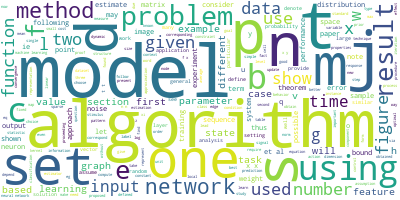

In [27]:
#Exploratory Analysis:
# To verify the preprocessing we use a word cloud 
from wordcloud import WordCloud
long_string = ','.join(list(papers['paper_text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [28]:
#Prepare text for LDA
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lizakukreja/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [29]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [30]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

In [31]:
# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['double', 'nothing', 'multiplicative', 'incentive', 'mechanisms', 'crowdsourcing', 'nihar', 'shah', 'university', 'california', 'berkeley', 'nihar', 'eecsberkeleyedu', 'dengyong', 'zhou', 'microsoft', 'research', 'dengyongzhou', 'microsoftcom', 'abstract', 'crowdsourcing', 'gained', 'immense', 'popularity', 'machine', 'learning', 'applications', 'obtaining', 'large', 'amounts']


In [32]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3), (6, 3), (7, 1), (8, 1), (9, 6), (10, 1), (11, 2), (12, 1), (13, 4), (14, 1), (15, 9), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 2), (22, 1), (23, 3), (24, 1), (25, 1), (26, 1), (27, 1), (28, 14), (29, 5)]


In [33]:
#LDA Model Training
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"model" + 0.006*"data" + 0.005*"learning" + 0.005*"function" + '
  '0.004*"models" + 0.004*"set" + 0.003*"one" + 0.003*"problem" + '
  '0.003*"using" + 0.003*"number"'),
 (1,
  '0.006*"learning" + 0.005*"algorithm" + 0.005*"function" + 0.005*"model" + '
  '0.004*"network" + 0.004*"data" + 0.004*"one" + 0.003*"set" + 0.003*"using" '
  '+ 0.003*"used"'),
 (2,
  '0.006*"learning" + 0.006*"model" + 0.005*"using" + 0.004*"set" + '
  '0.004*"data" + 0.004*"algorithm" + 0.004*"problem" + 0.003*"one" + '
  '0.003*"models" + 0.003*"results"'),
 (3,
  '0.007*"model" + 0.006*"learning" + 0.005*"data" + 0.004*"algorithm" + '
  '0.004*"set" + 0.004*"using" + 0.003*"one" + 0.003*"problem" + '
  '0.003*"figure" + 0.003*"distribution"'),
 (4,
  '0.005*"model" + 0.005*"algorithm" + 0.004*"learning" + 0.004*"set" + '
  '0.004*"time" + 0.004*"data" + 0.003*"using" + 0.003*"problem" + '
  '0.003*"models" + 0.003*"used"'),
 (5,
  '0.006*"learning" + 0.005*"data" + 0.005*"model" + 0.005*"algor

Analyzing our LDA model 
Now that we trained the model lets visualixe the topics for interpretablility 
pyLDAvis which is designed to help interactively with:

a)Better understanding and interpreting individual topics, and b)Better understanding the relationships between the topics.

In [34]:
pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 3.4 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=69b85684da10093e05b2207717f2506fe4f834e755359dab8caa4fa936b1ebf5
  Stored in directory: /Users/lizakukreja/Library/Caches/pip/wheels/57/a4/86/d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=37c81a2a0e2ba64a3e17ba5adcef16a000a11aa0100f0e0b3a024a8926d93197
  Stored in directory: /Users/lizakukreja/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built pyLDAvis sklearn
Note: you may need to restart the kernel to use updated packages.


In [35]:
#import pyLDAvis.gensim
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

In [36]:
# Visualize the topics
#pyLDAvis.enable_notebook()

#LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
#/**
#if 1 == 1:
#    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
#    with open(LDAvis_data_filepath, 'wb') as f:
#        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath, 'rb') as f:
#    LDAvis_prepared = pickle.load(f)

#pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
#LDAvis_prepared

In [38]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/Users/lizakukreja/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/lizakukreja/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/lizakukreja/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/lizakukreja/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/lizakukrej

/Users/lizakukreja/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/lizakukreja/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/lizakukreja/opt/anaconda3/lib/python3.9/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/lizakukreja/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/lizakukreja/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWa

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.000219 -0.009517       1        1  20.575971
8     -0.002493 -0.001677       2        1  15.350166
0      0.003603  0.000454       3        1  15.099923
1     -0.011501  0.002067       4        1  13.734354
5     -0.001752  0.002123       5        1  12.351838
3      0.000746  0.003902       6        1   7.854848
6      0.002688  0.000352       7        1   5.108190
2      0.006340  0.003222       8        1   4.415225
7      0.001203  0.001383       9        1   3.176636
4      0.000946 -0.002309      10        1   2.332850, topic_info=           Term         Freq        Total Category  logprob  loglift
572       model  1317.000000  1317.000000  Default  30.0000  30.0000
802         set   924.000000   924.000000  Default  29.0000  29.0000
516    learning  1401.000000  1401.000000  Default  28.0000  28.0000
28    algorithm  1046.000000  1046.000000  Default  27.0000  27.0000
193        data   973.000000   973.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
769     results    11.891521   564.011193  Topic10  -6.1032  -0.1012
1999     vector    10.079127   405.329877  Topic10  -6.2685   0.0638
80        based    10.855524   516.684717  Topic10  -6.1943  -0.1047
620         one    12.275032   779.604095  Topic10  -6.0714  -0.3931
598      neural    10.328918   560.352607  Topic10  -6.2440  -0.2355

[867 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
4036      1  0.148167  activation
4036      2  0.190501  activation
4036      3  0.095250  activation
4036      4  0.158751  activation
4036      5  0.095250  activation
...     ...       ...         ...
7361      6  0.121830         zni
7361      7  0.060915         zni
7361      8  0.121830         zni
7361      9  0.060915         zni
7362      3  0.386269          zx

[3715 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 1, 2, 6, 4, 7, 3, 8, 5])